# Capstone Project - Car accident severity (Week 1)

**Introduction**

Incidences can be caused by many factors such as environmental conditions which are controllable and uncontrollable. 
The levels of severity are also varied among accidents. The example data of an incident in Seattle shows the the collision can be some prpertry dammage to injury.  
In order to prevent and manage those incidences, the good understanding in causes and influence of those parameters is required.
The tools and the knowledge of data secience can be used to identify, classify and predict such of accident for furture reduction and prevention.

***

**DATA**

The example dataset is a collision records of Seattle which contains informtaion from 2006 untill 2020 with 194,673 records of accidents.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv('https://s3.us.cloud-object-storage.appdomain.cloud/cf-courses-data/CognitiveClass/DP0701EN/version-2/Data-Collisions.csv')

/opt/conda/envs/Python36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3020: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


The data records contain number of features such as information of record, information of accident, condition during accitent etc. 

Several features will be used for better understanding of their relation to the severity of accident. 

The selections are made based on following points:

- Non - controllable parameters : Weather
- Controllable parameters: Speeding 
- Indeependent parameters: Road condition


In [3]:
df.dtypes

SEVERITYCODE        int64
X                 float64
Y                 float64
OBJECTID            int64
INCKEY              int64
COLDETKEY           int64
REPORTNO           object
STATUS             object
ADDRTYPE           object
INTKEY            float64
LOCATION           object
EXCEPTRSNCODE      object
EXCEPTRSNDESC      object
SEVERITYCODE.1      int64
SEVERITYDESC       object
COLLISIONTYPE      object
PERSONCOUNT         int64
PEDCOUNT            int64
PEDCYLCOUNT         int64
VEHCOUNT            int64
INCDATE            object
INCDTTM            object
JUNCTIONTYPE       object
SDOT_COLCODE        int64
SDOT_COLDESC       object
INATTENTIONIND     object
UNDERINFL          object
WEATHER            object
ROADCOND           object
LIGHTCOND          object
PEDROWNOTGRNT      object
SDOTCOLNUM        float64
SPEEDING           object
ST_COLCODE         object
ST_COLDESC         object
SEGLANEKEY          int64
CROSSWALKKEY        int64
HITPARKEDCAR       object
dtype: objec

In [4]:
df1 = df[['SEVERITYCODE','COLLISIONTYPE','SEVERITYDESC','WEATHER','ROADCOND','SPEEDING']]
df1.head()

,SEVERITYCODE,COLLISIONTYPE,SEVERITYDESC,WEATHER,ROADCOND,SPEEDING
0,2,Angles,Injury Collision,Overcast,Wet,NaN
1,1,Sideswipe,Property Damage Only Collision,Raining,Wet,NaN
2,1,Parked Car,Property Damage Only Collision,Overcast,Dry,NaN
3,1,Other,Property Damage Only Collision,Clear,Dry,NaN
4,2,Angles,Injury Collision,Raining,Wet,NaN


1. Severity Code: represent the severity of the accident

- Code 1: Property Damage only Collison 
- Code 2: Injury Collision

In [5]:
df2 = df1['SEVERITYCODE'].value_counts().to_frame()
df2_p = round((df2/194673)*100,2)
pd.DataFrame(data=df2_p.values, index = df2_p.index, columns=['Severity_Code_Percentage'])

,Severity_Code_Percentage
1,70.11
2,29.89


In [6]:
#df1['COLLISIONTYPE'].isnull().count()

The severity levels of accident are defined by the code 1 indicates the accident with only property damage and code 2 involves injury. 

The number of records for code 1 are 136,485 cases (roughly 70%) and for code 2 are 58,188 cases (30%).

*Figure1 : Bar chart shows Number of cases for Severity Code 1 and 2*

In [7]:
C_1 = df1[df1.SEVERITYCODE==1]
C_2 = df1[df1.SEVERITYCODE==2]

2. Collision types: the types of collision 

For code 1 severity, the numbers of cases for different collision types are as shown in table.

The highest number of incident for property dammage occurs during the parked car, follows by angle collision and rear ended. 

In [8]:
C_11 = C_1.groupby('COLLISIONTYPE').count()
C_11['SEVERITYCODE'].to_frame()

,SEVERITYCODE
COLLISIONTYPE,
Angles,21050
Cycles,671
Head On,1152
Left Turn,8292
Other,17591
Parked Car,45325
Pedestrian,672
Rear Ended,19419
Right Turn,2347


On other hands, numbers of cases for code 2 severity show slight different with the highest in rear ended, following by angles collision and others.

In [9]:
C_21 = C_2.groupby('COLLISIONTYPE').count()
C_21['SEVERITYCODE'].to_frame()

,SEVERITYCODE
COLLISIONTYPE,
Angles,13624
Cycles,4744
Head On,872
Left Turn,5411
Other,6112
Parked Car,2662
Pedestrian,5936
Rear Ended,14671
Right Turn,609


In [10]:
A = df1['COLLISIONTYPE'].value_counts()

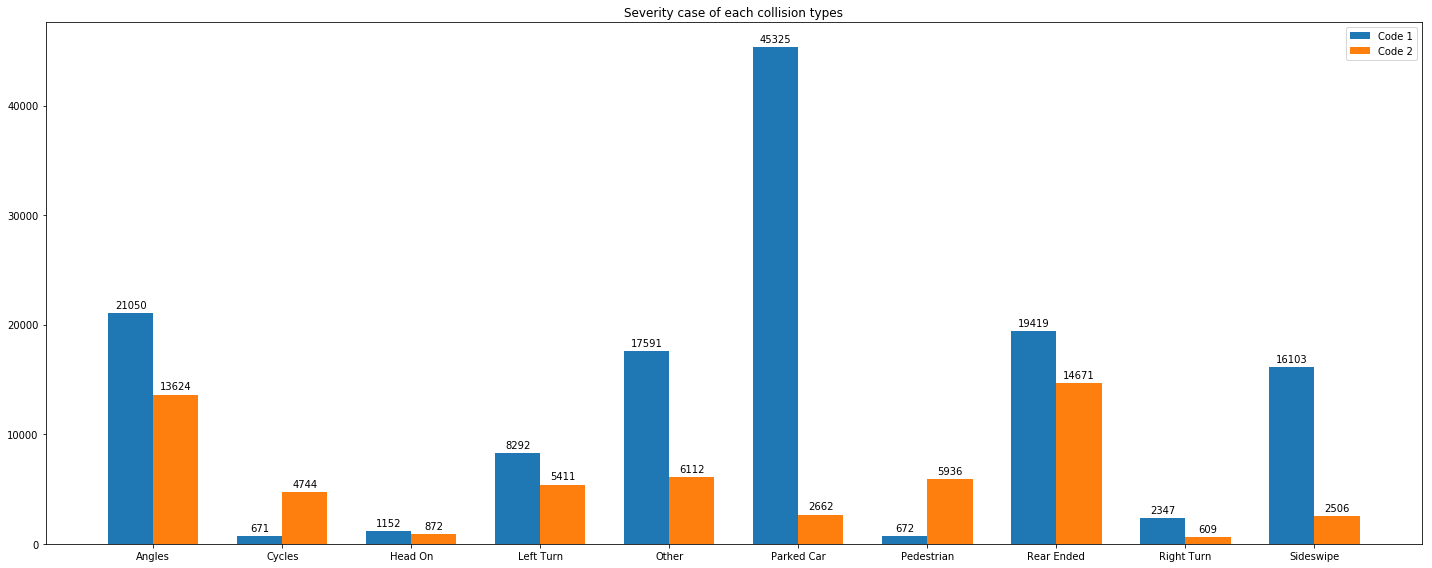

In [11]:
fig, ax = plt.subplots(figsize= [20,8])
width = 0.35

x = np.arange(len(A))
rects1 = ax.bar(x - width/2, C_11['SEVERITYCODE'], width, label='Code 1')
rects2 = ax.bar(x + width/2, C_21['SEVERITYCODE'], width, label='Code 2')

ax.set_title('Severity case of each collision types')
ax.set_xticks(x)
ax.set_xticklabels(C_21.index)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

3. Weather: the condition of weather during the accident
The data shows most of incident occured during the clear weather with the highest number of records for both code. 

In [12]:
C_12 = C_1.groupby('WEATHER').count()
C_12['SEVERITYCODE'].to_frame()

,SEVERITYCODE
WEATHER,
Blowing Sand/Dirt,41
Clear,75295
Fog/Smog/Smoke,382
Other,716
Overcast,18969
Partly Cloudy,2
Raining,21969
Severe Crosswind,18
Sleet/Hail/Freezing Rain,85


*Severity code 1*

In [13]:
C_22 = C_2.groupby('WEATHER').count()
C_22['SEVERITYCODE'].to_frame()

,SEVERITYCODE
WEATHER,
Blowing Sand/Dirt,15
Clear,35840
Fog/Smog/Smoke,187
Other,116
Overcast,8745
Partly Cloudy,3
Raining,11176
Severe Crosswind,7
Sleet/Hail/Freezing Rain,28


*Severity code 2*

In [14]:
B = df1['WEATHER'].value_counts()

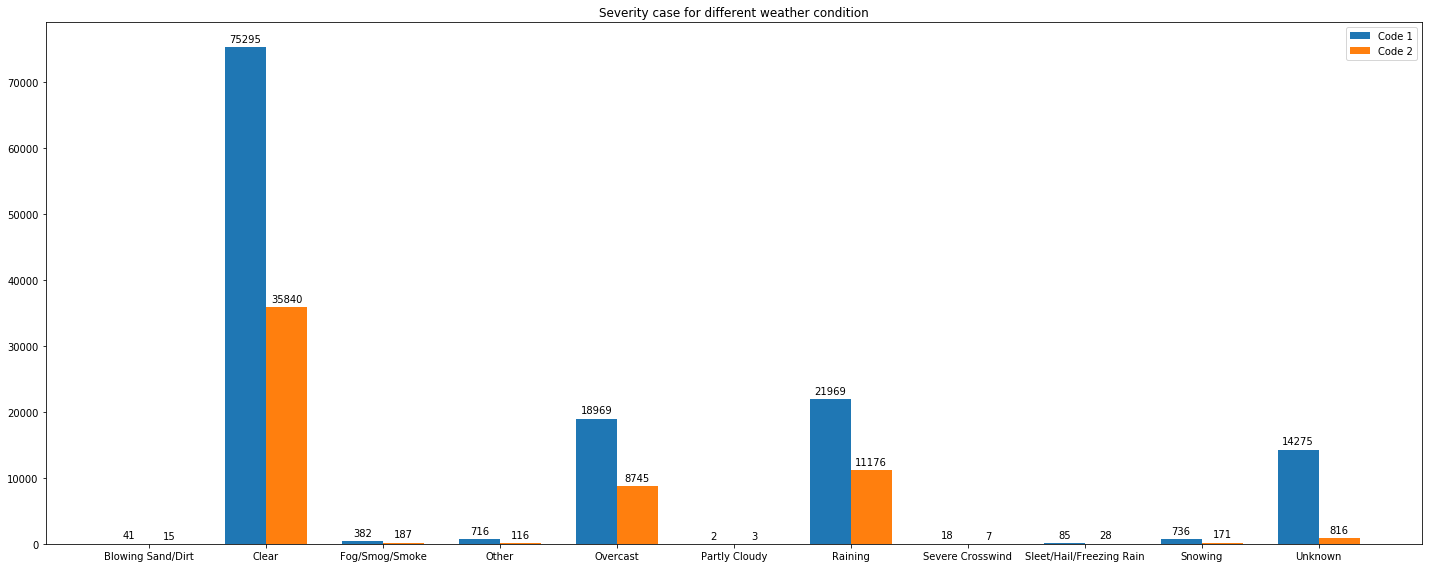

In [15]:
fig, ax = plt.subplots(figsize= [20,8])

x = np.arange(len(B))
rects1 = ax.bar(x - width/2, C_12['SEVERITYCODE'], width, label='Code 1')
rects2 = ax.bar(x + width/2, C_22['SEVERITYCODE'], width, label='Code 2')

ax.set_title('Severity case for different weather condition')
ax.set_xticks(x)
ax.set_xticklabels(C_22.index)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

*Table ii: Table shows Number of cases for Severity Code 1 and 2 depending on weather*

4. Road Condition: the condition of road during the accident

In [16]:
C = df1['ROADCOND'].value_counts()

In [17]:
C_13 = C_1.groupby('ROADCOND').count()
C_13['SEVERITYCODE'].to_frame()

,SEVERITYCODE
ROADCOND,
Dry,84446
Ice,936
Oil,40
Other,89
Sand/Mud/Dirt,52
Snow/Slush,837
Standing Water,85
Unknown,14329
Wet,31719


*Severity code 1*

In [18]:
C_23 = C_2.groupby('ROADCOND').count()
C_23['SEVERITYCODE'].to_frame()

,SEVERITYCODE
ROADCOND,
Dry,40064
Ice,273
Oil,24
Other,43
Sand/Mud/Dirt,23
Snow/Slush,167
Standing Water,30
Unknown,749
Wet,15755


*Severity code 2*

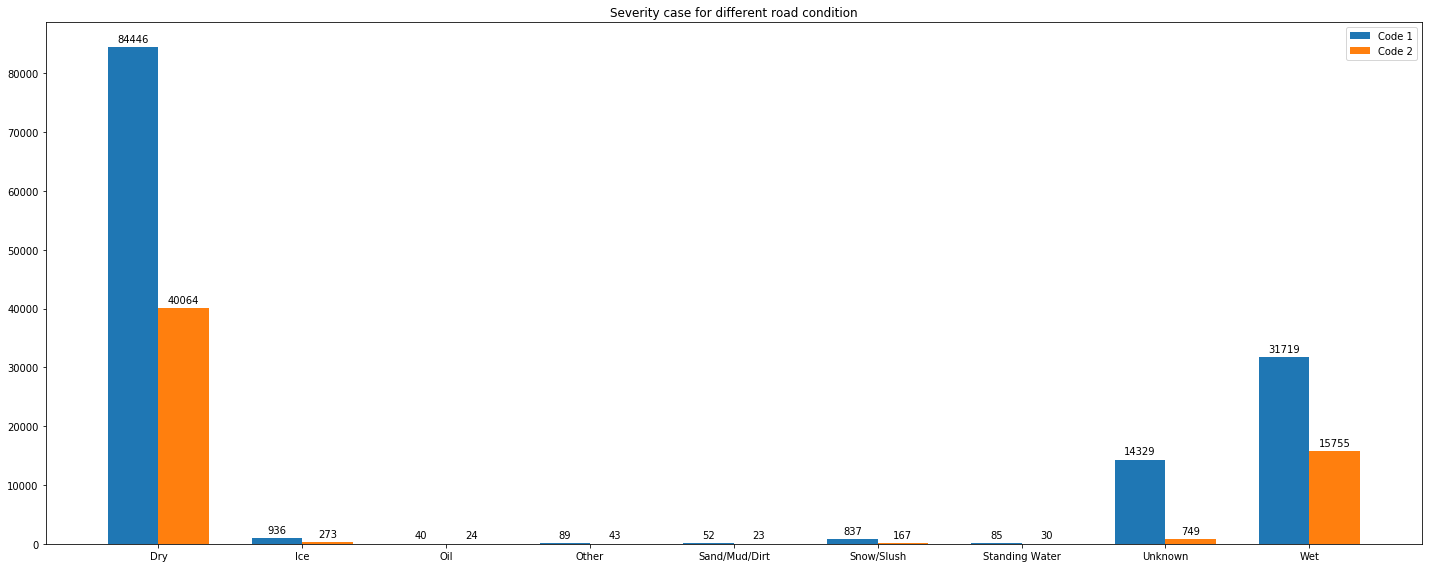

In [19]:
fig, ax = plt.subplots(figsize= [20,8])

x = np.arange(len(C))
rects1 = ax.bar(x - width/2, C_13['SEVERITYCODE'], width, label='Code 1')
rects2 = ax.bar(x + width/2, C_23['SEVERITYCODE'], width, label='Code 2')

ax.set_title('Severity case for different road condition')
ax.set_xticks(x)
ax.set_xticklabels(C_23.index)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

Considering codition of the road, most of accidents occur on dry condition for both severity code. 

*Table iii: Table shows Number of cases for Severity Code 1 and 2 depending on road condition*

In [20]:
D = df1['SPEEDING'].value_counts()
D

Y    9333
Name: SPEEDING, dtype: int64

In [21]:
C_14 = C_1.groupby('SPEEDING').count()
C_14['SEVERITYCODE'].to_frame()

,SEVERITYCODE
SPEEDING,
Y,5802


*Severity code 1*

In [22]:
C_24 = C_2.groupby('SPEEDING').count()
C_24['SEVERITYCODE'].to_frame()

,SEVERITYCODE
SPEEDING,
Y,3531


*Severity code 2*

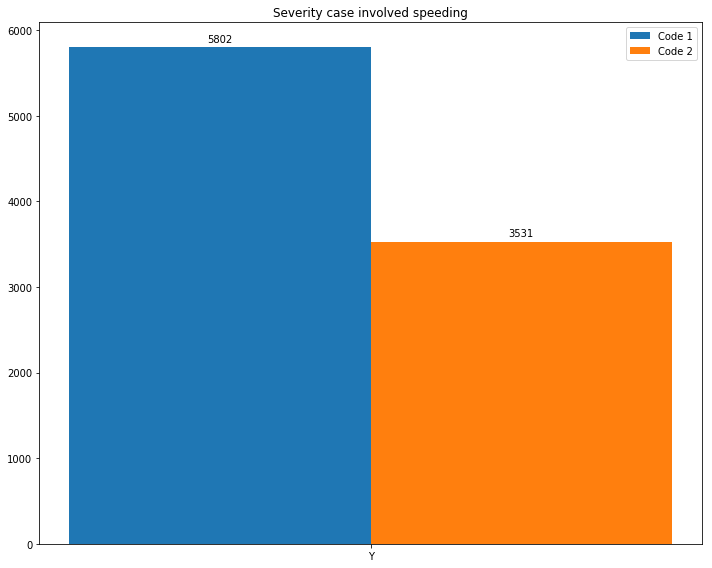

In [23]:
fig, ax = plt.subplots(figsize= [10,8])

x = np.arange(len(D))
rects1 = ax.bar(x - width/2, C_14['SEVERITYCODE'], width, label='Code 1')
rects2 = ax.bar(x + width/2, C_24['SEVERITYCODE'], width, label='Code 2')

ax.set_title('Severity case involved speeding')
ax.set_xticks(x)
ax.set_xticklabels(D.index)
ax.legend()


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)
fig.tight_layout()

plt.show()

There are 9,333 accidents involved speeding which around 3,500 cases are injury collision.

*Table iv: Table shows Number of cases for Severity Code 1 and 2 depending on speeding*

The target predicted variable of the project will be 'SEVERITY CODE' because it is used indicate the severity of an accident. 

The Attributes that will be used to weigh the severity of an accident are 'Collision types' 'Weather','Road condition' and 'Speeding'.

The current data contains many information that won't be used in the analysis. It is imporatant to primarily pre-process the data as following

- Extract Severitycode, collision types, weather, road condition and speeding out from the dataset


- Convert Categorical features to numerical values


- Select featuers of interest from each attributes 


- Append all data into the feature Data Frame




# Methodology

**Pre-Processing**

Data of Severitycode, collision types, weather, road condition and speeding are extracted from the dataset record of A seattle accident record.

An example of table is showed in figure. 

In [24]:
df1.head(2)

,SEVERITYCODE,COLLISIONTYPE,SEVERITYDESC,WEATHER,ROADCOND,SPEEDING
0,2,Angles,Injury Collision,Overcast,Wet,NaN
1,1,Sideswipe,Property Damage Only Collision,Raining,Wet,NaN


After extract the data, catagorical features were converted into numerical values and append together in a data fram called x 

In [25]:
num1 = pd.get_dummies(df1['COLLISIONTYPE'])
num2 = pd.get_dummies(df1['WEATHER'])
num3 = pd.get_dummies(df1['ROADCOND'])
num4 = pd.get_dummies(df1['SPEEDING'])


In [26]:
x = pd.concat([num1,num2,num3,num4], axis =1)
x.head()

,Angles,Cycles,Head On,Left Turn,Other,Parked Car,Pedestrian,Rear Ended,Right Turn,Sideswipe,...,Dry,Ice,Oil,Other,Sand/Mud/Dirt,Snow/Slush,Standing Water,Unknown,Wet,Y
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,1,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [27]:
x.shape

(194673, 31)

In [28]:
y = df1['SEVERITYCODE'].values

The first row of data contained all 31 sub-features of 4 selected features of interest with the number of total cases of 194,673.

In [29]:
import itertools
import matplotlib.ticker as ticker
from sklearn import preprocessing
%matplotlib inline

In [30]:
x = preprocessing.StandardScaler().fit(x).transform(x)

/opt/conda/envs/Python36/lib/python3.6/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/opt/conda/envs/Python36/lib/python3.6/site-packages/ipykernel/__main__.py:1: DataConversionWarning: Data with input dtype uint8 were all converted to float64 by StandardScaler.
  if __name__ == '__main__':


In [31]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=4)
print ('Train set:', x_train.shape, y_train.shape)
print ('Test set:', x_test.shape, y_test.shape)

Train set: (155738, 31) (155738,)
Test set: (38935, 31) (38935,)


**Model Clasification**

The following algorithm will be used to find the most accurate a prediction model of accident severity based on the selected features :


- Decision Tree


- Logistic Regression



1. Decision Tree 
Decision tree is easy to understand and implement to simple data. 

The methods of Decision tree are as following:

In [32]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

- Data was devided into trainset data for training the model and test data for testing the model.

In [33]:
X_trainset, X_testset, y_trainset, y_testset = train_test_split(x, y, test_size=0.3, random_state=3)
n_max_depth = 15 
best_max_depth = 1 
lists = [[],[]]

- For an accuracy model, depth of calucation is needed to be first calculated.

In [35]:
for m in range(3, n_max_depth): 
    Tree = DecisionTreeClassifier(criterion="entropy", max_depth = m)
    Tree.fit(X_trainset, y_trainset) 
    pred = Tree.predict(X_testset)

In [38]:
from sklearn import metrics
acc = metrics.accuracy_score(y_testset, pred)
lists[0].append(acc) 
lists[1].append(m)

In [39]:
if acc== max(lists[0]):
    
    best_acc = acc 
    best_max_depth = m 
    best_tree = Tree
    
print("The best accuracy of DT is ", best_acc, "with a max depth of ", best_max_depth)

The best accuracy of DT is  0.7467210027053868 with a max depth of  14


The calculation showed the best value for the most accuracy value is at depth value of 14. 

The depth value is then used to train final model for prediction.

In [41]:
Tree = DecisionTreeClassifier(criterion="entropy", max_depth = best_max_depth)
Tree.fit(X_trainset,y_trainset)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=14,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

After model was trained, the prediction results should also be tested with the test value. 

The value of f1 score and Jaccard similarity score are used as in the indicator of accuracy.

In [43]:
from sklearn.metrics import jaccard_similarity_score 
from sklearn.metrics import f1_score
from sklearn.metrics import log_loss

In [44]:
predTree = Tree.predict(X_testset) 
f1_dec = f1_score(y_testset,predTree, average='weighted') 
jaccard_dec = jaccard_similarity_score(y_testset,predTree)
print("DecisionTrees's Accuracy: ", metrics.accuracy_score(y_testset, predTree))

DecisionTrees's Accuracy:  0.7466867573028321


2. Logistic Regression

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

LR = LogisticRegression(C=0.01, solver='liblinear').fit(x_train,y_train)

In [46]:
yhat_LR = LR.predict(x_test)
yhat_LR_prob = LR.predict_proba(x_test)
f1_LR = f1_score(y_test, yhat_LR, average='weighted') 
jaccard_LR = jaccard_similarity_score(y_test, yhat_LR)

In [47]:
from sklearn.metrics import log_loss
logloss_LR = log_loss(y_test, yhat_LR_prob)


# Result

The results of the prediction model will be discussed in this section.

The aim of the model is to predict the severity of the incident due to the influence of collision types, weather, road condition and speed.

Table shows the comparision of 2 models from different prediction methods which are decision tree and logistic decision.

In [49]:
from pandas import DataFrame

df_result = DataFrame({'Algorithm':['Decision Tree','LogisticRegression'],
'Jaccard' :[jaccard_dec,jaccard_LR],
'F1-score' : [f1_dec,f1_LR],
'LogLoss' : ['NA',logloss_LR] })


In [50]:
df_result

,Algorithm,Jaccard,F1-score,LogLoss
0,Decision Tree,0.746687,0.684699,NA
1,LogisticRegression,0.753332,0.697799,0.489044


The result of Logistic regression shows higher accuracy considered F1 score and Jaccar score. 
As the result of that Logistic Regression model is more appropiate to be used as prediction model for this kind of analysis. 

# Discussion

The accuracy analysis results of 2 model shows the higher value for logistic regression, however, the different between 2 models are small.

For more accuracy results, more features and relationship between features should be studied and considered. 

# Conclusion

To conclude the analysis, the severity of car incident influence by collision types, weather, road condition and speed can be model using logistic regression which give

around 75.3 per cent accuracy. The model can be further improved by the study of relation between features, with additional feature or dynamic data